# Dense - Test

## Version de Python

Python 3.6

In [1]:
!python --version

Python 3.6.9


## Version de Pytorch

Pytorch 1.1 o superiro

In [2]:
import torch
print(torch.__version__)

1.4.0


## Instalar dependencias

In [3]:
pip install torch torchvision scikit-image h5py

## Descargar el repositorio

In [4]:
!git clone https://github.com/google/mannequinchallenge

Cloning into 'mannequinchallenge'...
remote: Enumerating objects: 205, done.
remote: Total 205 (delta 0), reused 0 (delta 0), pack-reused 205
Receiving objects: 100% (205/205), 1.05 MiB | 2.44 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [5]:
cd /content/mannequinchallenge/

/content/mannequinchallenge


## Descargar checkpoints

In [6]:
!./fetch_checkpoints.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20.6M  100 20.6M    0     0  24.4M      0 --:--:-- --:--:-- --:--:-- 24.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20.6M  100 20.6M    0     0  24.0M      0 --:--:-- --:--:-- --:--:-- 24.0M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20.7M  100 20.7M    0     0  24.0M      0 --:--:-- --:--:-- --:--:-- 24.0M


## Descargar los datos

In [7]:
!./fetch_davis_data.sh

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: DAVIS/JPEGImages/480p/elephant/00031.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00019.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00068.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00078.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00032.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00055.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00023.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00053.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00018.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00004.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00020.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00067.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00026.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00057.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00071.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00028.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant

## Se pass el test

In [8]:
!python test_davis_videos.py --input=single_view

------------ Options -------------
batchSize: 8
beta1: 0.5
checkpoints_dir: ./checkpoints/
continue_train: False
display_freq: 100
display_id: 1
display_winsize: 256
fineSize: 256
gpu_ids: [0, 1, 2, 3]
human_data_term: 0
identity: 0.0
input: single_view
isTrain: True
lambda_A: 10.0
lambda_B: 10.0
loadSize: 286
lr: 0.0004
lr_decay_epoch: 8
lr_policy: step
max_dataset_size: inf
mode: Ours_Bilinear
model: pix2pix
nThreads: 2
name: test_local
ndf: 64
ngf: 64
niter: 100
niter_decay: 100
no_flip: False
no_html: False
no_lsgan: False
norm: instance
output_nc: 3
phase: train
pool_size: 50
print_freq: 100
save_epoch_freq: 5
save_latest_freq: 5000
serial_batches: False
simple_keypoints: 0
use_dropout: False
which_epoch: latest
which_model_netG: unet_256
-------------- End ----------------
========================= Video dataset #images = 71 =========
======================================  DIW NETWORK TRAIN FROM Ours_Bilinear=======================
===================Loading Pretrained Model OUR

## Se compruebs el resultado

In [9]:
cd /content/mannequinchallenge/test_data/viz_predictions/breakdance-flare/

/content/mannequinchallenge/test_data/viz_predictions/breakdance-flare


In [10]:
!ls

00000.jpg  00011.jpg  00022.jpg  00033.jpg  00044.jpg  00055.jpg  00066.jpg
00001.jpg  00012.jpg  00023.jpg  00034.jpg  00045.jpg  00056.jpg  00067.jpg
00002.jpg  00013.jpg  00024.jpg  00035.jpg  00046.jpg  00057.jpg  00068.jpg
00003.jpg  00014.jpg  00025.jpg  00036.jpg  00047.jpg  00058.jpg  00069.jpg
00004.jpg  00015.jpg  00026.jpg  00037.jpg  00048.jpg  00059.jpg  00070.jpg
00005.jpg  00016.jpg  00027.jpg  00038.jpg  00049.jpg  00060.jpg
00006.jpg  00017.jpg  00028.jpg  00039.jpg  00050.jpg  00061.jpg
00007.jpg  00018.jpg  00029.jpg  00040.jpg  00051.jpg  00062.jpg
00008.jpg  00019.jpg  00030.jpg  00041.jpg  00052.jpg  00063.jpg
00009.jpg  00020.jpg  00031.jpg  00042.jpg  00053.jpg  00064.jpg
00010.jpg  00021.jpg  00032.jpg  00043.jpg  00054.jpg  00065.jpg


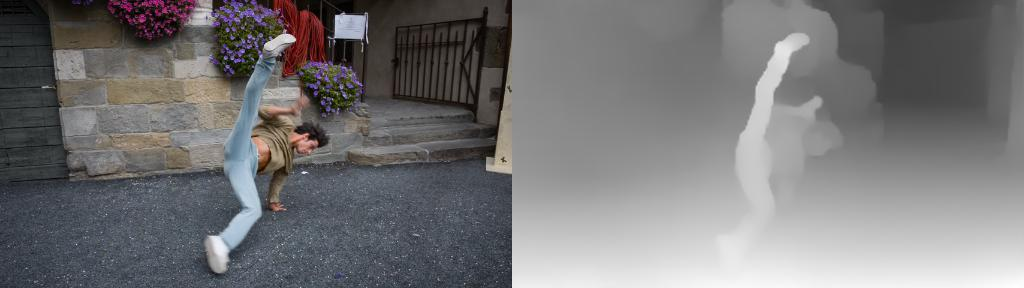

In [12]:
from IPython.display import Image
Image('00070.jpg')

In [13]:
cat /content/mannequinchallenge/test_davis_videos.py

# Copyright 2019 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import torch
from options.train_options import TrainOptions
from loaders import aligned_data_loader
from models import pix2pix_model

BATCH_SIZE = 1

opt = TrainOptions().parse()  # set CUDA_VISIBLE_DEVICES before import torch

video_list = 'test_data/test_davis_video_list.txt'

eval_num_threads = 2
video_data_loader = aligned_data_loader.DAVISDataLoader(video_list, BATCH_SIZE)
video_dataset = video_data_loader.load_data()
p